# Proyecto 2 - Modelos de Regresión Lineal
## Universidad del Valle de Guatemala
### Minería de Datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## 1. Descarga de los conjuntos de datos (ya están cargados en train_df y test_df)

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
print("Información del dataset de entrenamiento:")
print(train_df.info())
print("\nPrimeras filas del dataset de entrenamiento:")
print(train_df.head())

Información del dataset de entrenamiento:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQua

## 3. Análisis de grupos en los datos

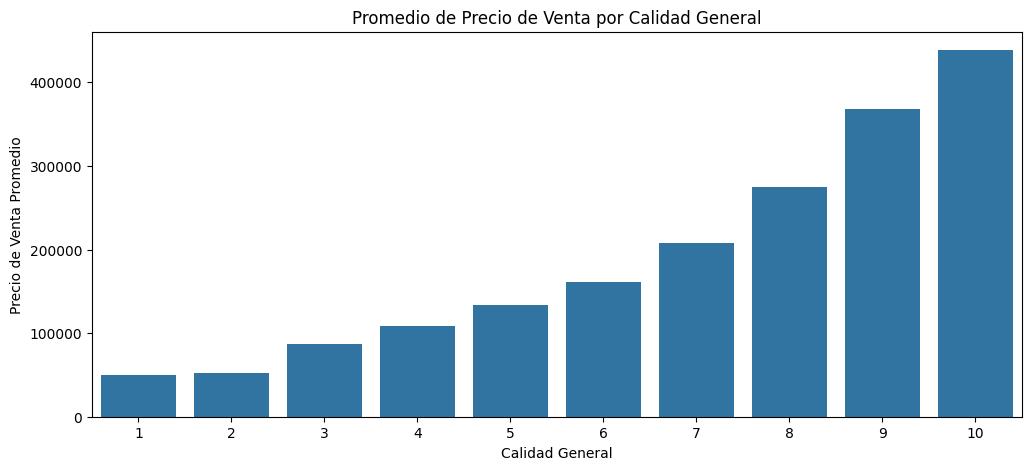

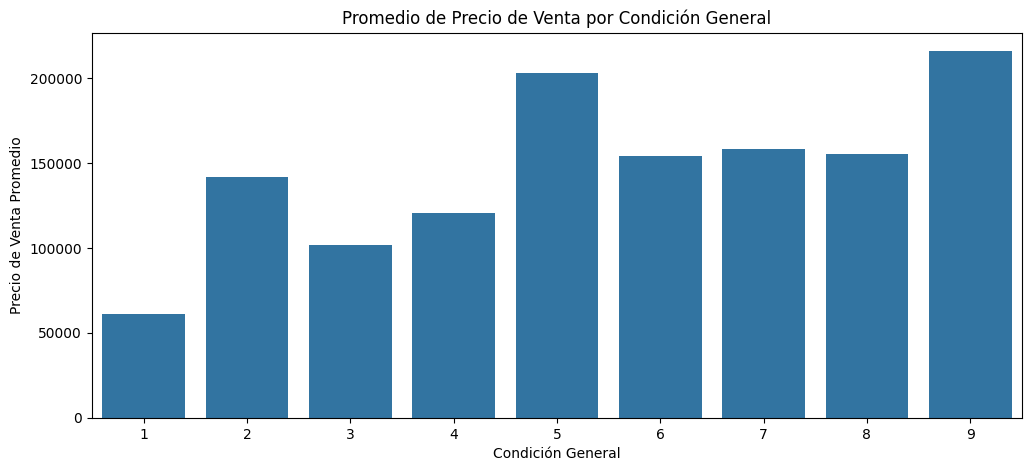

(OverallQual
 1      50150.000000
 2      51770.333333
 3      87473.750000
 4     108420.655172
 5     133523.347607
 6     161603.034759
 7     207716.423197
 8     274735.535714
 9     367513.023256
 10    438588.388889
 Name: SalePrice, dtype: float64,
 OverallCond
 1     61000.000000
 2    141986.400000
 3    101929.400000
 4    120438.438596
 5    203146.914738
 6    153961.591270
 7    158145.487805
 8    155651.736111
 9    216004.545455
 Name: SalePrice, dtype: float64)

In [9]:
# Agrupar por calidad general y calcular el precio promedio de venta
quality_groups = train_df.groupby('OverallQual')['SalePrice'].mean()

# Agrupar por condición general y calcular el precio promedio de venta
condition_groups = train_df.groupby('OverallCond')['SalePrice'].mean()

# Visualizar los grupos
plt.figure(figsize=(12, 5))
sns.barplot(x=quality_groups.index, y=quality_groups.values)
plt.title("Promedio de Precio de Venta por Calidad General")
plt.xlabel("Calidad General")
plt.ylabel("Precio de Venta Promedio")
plt.show()

plt.figure(figsize=(12, 5))
sns.barplot(x=condition_groups.index, y=condition_groups.values)
plt.title("Promedio de Precio de Venta por Condición General")
plt.xlabel("Condición General")
plt.ylabel("Precio de Venta Promedio")
plt.show()

quality_groups, condition_groups


## 5. Ingeniería de características

In [4]:
correlation_matrix = train_df.corr()
correlation_target = correlation_matrix["SalePrice"].sort_values(ascending=False)
selected_features = correlation_target[1:10].index.tolist()
print("Variables seleccionadas para el modelo:", selected_features)

Variables seleccionadas para el modelo: ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']


## 7. Modelo de Regresión Lineal Univariado

Error Cuadrático Medio (MSE): 2681026163.5090904
Coeficiente de determinación (R²): 0.6504677778896863


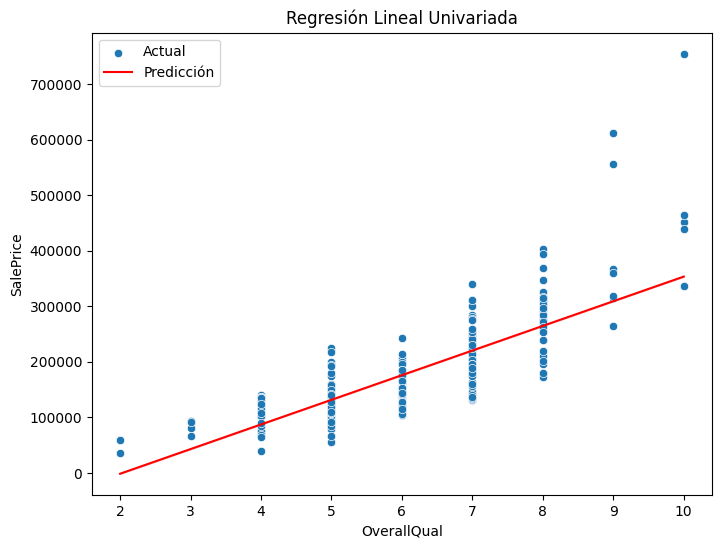

In [5]:
best_feature = selected_features[0]
X = train_df[[best_feature]]
y = train_df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"Coeficiente de determinación (R²): {r2}")

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test[best_feature], y=y_test, label="Actual")
sns.lineplot(x=X_test[best_feature], y=y_pred, color='red', label="Predicción")
plt.xlabel(best_feature)
plt.ylabel("SalePrice")
plt.title("Regresión Lineal Univariada")
plt.legend()
plt.show()